In [1]:
import warnings
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 

%matplotlib inline

Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

In [3]:
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])

data.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


In [4]:
data.describe()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
count,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000,145374.000000
mean,32079.773047,2009.801340,6.435979,15.722681,2.481241,180.459835,26.218643,2.999168,11.501101,0.027233,0.027075,0.027240
std,6464.167501,4.791885,3.438982,8.801258,1.114448,105.138073,15.019836,1.999572,6.921927,0.162763,0.162303,0.162783
min,14544.000000,2002.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27573.000000,2006.000000,3.000000,8.000000,1.000000,90.000000,13.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,31421.000000,2010.000000,6.000000,16.000000,2.000000,179.000000,26.000000,3.000000,12.000000,0.000000,0.000000,0.000000
75%,35648.750000,2014.000000,9.000000,23.000000,3.000000,271.000000,39.000000,5.000000,18.000000,0.000000,0.000000,0.000000
max,62009.000000,2018.000000,12.000000,31.000000,4.000000,366.000000,53.000000,6.000000,23.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'МВт')

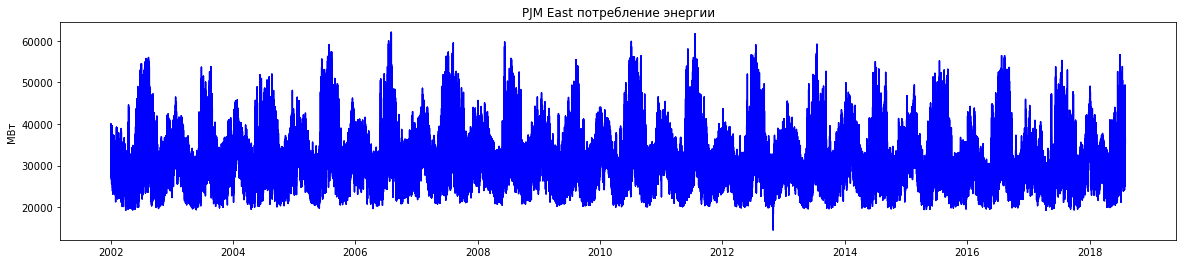

In [5]:
plt.figure(figsize =(20,4))
plt.plot( data.index, data['PJME_MW'], 'b' )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )

In [6]:
data_m = data.resample('M').mean()
data_w = data.resample('W').mean()

Text(0, 0.5, 'МВт')

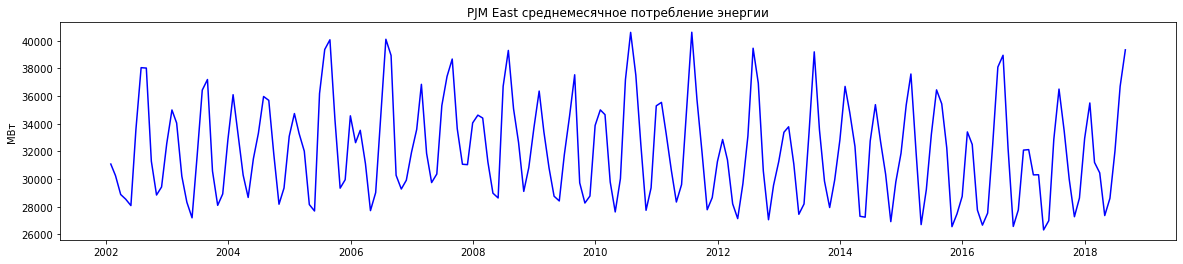

In [7]:
plt.figure(figsize =(20,4))
plt.plot( data_m.index, data_m['PJME_MW'], 'b' )
plt.title('PJM East среднемесячное потребление энергии' )
plt.ylabel ( 'МВт' )

Подберите параметры модели SARIMAX для этого ряда.

In [8]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

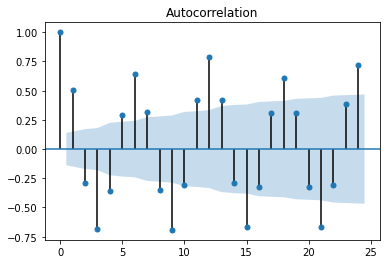

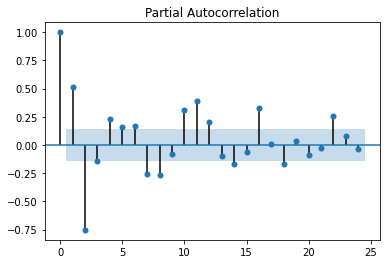

In [9]:
sm.graphics.tsa.plot_acf(data_m['PJME_MW'].values, lags=24)
plt.show()
sm.graphics.tsa.plot_pacf(data_m['PJME_MW'].values, lags=24)
plt.show()

Видно, что есть годовая сезонность. Т.е. $S=12$

На $ACF$ видна достаточно высокая корреляция с $1, 2, 3, 6$ месяцами. Соответственно можно рассмотреть $q=\{0,1,2,3,4,5,6\}$

На $PACF$ хорошая корреляция с $1, 2$ месяцами. Соответственно можно рассмотреть $p=\{0,1,2\}$

Подберем сезонные параметры.

На $ACF$ видна достаточно высокая корреляция с $1, 2$ сезонами. Соответственно можно рассмотреть $q=\{0,1, 2\}$

На $PACF$ хорошая корреляция с $1$ сезоном. Соответственно можно рассмотреть $p=\{0,1\}$

In [10]:
import itertools

# Определим p, d и q
p = [0, 1, 2]
q = range(0,7)
d = [1, 2]
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))

# зададим сезонность p, q и q
p = [0, 1]
q = range(0,3) 
d = [0,1]

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[1]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 1) x (0, 0, 0, 12)
SARIMAX: (0, 1, 2) x (0, 0, 0, 12)
SARIMAX: (0, 1, 2) x (0, 0, 1, 12)


In [11]:
warnings.filterwarnings("ignore")

min_aic = np.inf

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-12],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            if results.aic < min_aic:
                min_aic = results.aic
                best_param = param
                best_param_seasonal = param_seasonal
            print('ARIMA{}x{} - AIC: {}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC: 3564.869515313325
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC: 3246.0253157419775
ARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC: 3008.8020924468296
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC: 3180.627524425586
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC: 2917.5893676143232
ARIMA(0, 1, 0)x(0, 1, 2, 12) - AIC: 2696.4003725737593
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC: 3183.0177832639947
ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC: 3133.7225796737994
ARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC: 2909.9018821808204
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC: 2952.072241329266
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC: 2917.5680083128973
ARIMA(0, 1, 0)x(1, 1, 2, 12) - AIC: 2684.782744930433
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC: 3512.59206190215
ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC: 3225.3570601328192
ARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC: 2969.003812410444
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC: 3131.5534504989782
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC: 2859.5938665159397
ARIMA(0, 1, 1)x(0, 1, 2, 12) - AIC: 2644.069058371896
ARIMA(0, 1, 1)x(1,

ARIMA(0, 2, 5)x(1, 0, 1, 12) - AIC: 3107.431286042476
ARIMA(0, 2, 5)x(1, 0, 2, 12) - AIC: 2888.7641569769894
ARIMA(0, 2, 5)x(1, 1, 0, 12) - AIC: 2951.995125546605
ARIMA(0, 2, 5)x(1, 1, 1, 12) - AIC: 2820.185947558603
ARIMA(0, 2, 5)x(1, 1, 2, 12) - AIC: 2604.1720512201437
ARIMA(0, 2, 6)x(0, 0, 0, 12) - AIC: 3346.324595376015
ARIMA(0, 2, 6)x(0, 0, 1, 12) - AIC: 3109.72246274361
ARIMA(0, 2, 6)x(0, 0, 2, 12) - AIC: 2889.661944551912
ARIMA(0, 2, 6)x(0, 1, 0, 12) - AIC: 3049.9049266583734
ARIMA(0, 2, 6)x(0, 1, 1, 12) - AIC: 2813.980234387802
ARIMA(0, 2, 6)x(0, 1, 2, 12) - AIC: 2595.1795278055934
ARIMA(0, 2, 6)x(1, 0, 0, 12) - AIC: 3247.9098587721446
ARIMA(0, 2, 6)x(1, 0, 1, 12) - AIC: 3090.708315308937
ARIMA(0, 2, 6)x(1, 0, 2, 12) - AIC: 2870.804312977103
ARIMA(0, 2, 6)x(1, 1, 0, 12) - AIC: 2957.758294232151
ARIMA(0, 2, 6)x(1, 1, 1, 12) - AIC: 2813.164766016456
ARIMA(0, 2, 6)x(1, 1, 2, 12) - AIC: 2596.7816765003386
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC: 3546.4538282504063
ARIMA(1, 1, 0)x(0, 0, 

ARIMA(1, 2, 4)x(0, 0, 2, 12) - AIC: 2917.558300084468
ARIMA(1, 2, 4)x(0, 1, 0, 12) - AIC: 3096.9461843160466
ARIMA(1, 2, 4)x(0, 1, 1, 12) - AIC: 2814.7869606338118
ARIMA(1, 2, 4)x(0, 1, 2, 12) - AIC: 2600.3910434594727
ARIMA(1, 2, 4)x(1, 0, 0, 12) - AIC: 3201.170647412486
ARIMA(1, 2, 4)x(1, 0, 1, 12) - AIC: 3119.0436423907095
ARIMA(1, 2, 4)x(1, 0, 2, 12) - AIC: 2968.3019370066877
ARIMA(1, 2, 4)x(1, 1, 0, 12) - AIC: 2917.4988259598363
ARIMA(1, 2, 4)x(1, 1, 1, 12) - AIC: 2815.0609083791296
ARIMA(1, 2, 4)x(1, 1, 2, 12) - AIC: 2600.151718683448
ARIMA(1, 2, 5)x(0, 0, 0, 12) - AIC: 3353.2650861781694
ARIMA(1, 2, 5)x(0, 0, 1, 12) - AIC: 3114.20449028399
ARIMA(1, 2, 5)x(0, 0, 2, 12) - AIC: 2894.2531668084425
ARIMA(1, 2, 5)x(0, 1, 0, 12) - AIC: 3076.866552871362
ARIMA(1, 2, 5)x(0, 1, 1, 12) - AIC: 2806.7741696113435
ARIMA(1, 2, 5)x(0, 1, 2, 12) - AIC: 2591.2790809032876
ARIMA(1, 2, 5)x(1, 0, 0, 12) - AIC: 3197.2900984746007
ARIMA(1, 2, 5)x(1, 0, 1, 12) - AIC: 3091.494999986034
ARIMA(1, 2, 5)x(1

ARIMA(2, 2, 2)x(1, 1, 0, 12) - AIC: 2903.197158316096
ARIMA(2, 2, 2)x(1, 1, 1, 12) - AIC: 2849.865920441608
ARIMA(2, 2, 2)x(1, 1, 2, 12) - AIC: 2639.4022767458528
ARIMA(2, 2, 3)x(0, 0, 0, 12) - AIC: 3318.84155769151
ARIMA(2, 2, 3)x(0, 0, 1, 12) - AIC: 3099.9168106763964
ARIMA(2, 2, 3)x(0, 0, 2, 12) - AIC: 2887.011132502682
ARIMA(2, 2, 3)x(0, 1, 0, 12) - AIC: 3119.1189447220822
ARIMA(2, 2, 3)x(0, 1, 1, 12) - AIC: 2827.921650519051
ARIMA(2, 2, 3)x(0, 1, 2, 12) - AIC: 2611.3441397343095
ARIMA(2, 2, 3)x(1, 0, 0, 12) - AIC: 3140.3026620480077
ARIMA(2, 2, 3)x(1, 0, 1, 12) - AIC: 3083.6692361272
ARIMA(2, 2, 3)x(1, 0, 2, 12) - AIC: 2868.551517226765
ARIMA(2, 2, 3)x(1, 1, 0, 12) - AIC: 2896.8143054307584
ARIMA(2, 2, 3)x(1, 1, 1, 12) - AIC: 2828.3436530376025
ARIMA(2, 2, 3)x(1, 1, 2, 12) - AIC: 2614.123752963236
ARIMA(2, 2, 4)x(0, 0, 0, 12) - AIC: 3296.3495786409067
ARIMA(2, 2, 4)x(0, 0, 1, 12) - AIC: 3069.0585295467868
ARIMA(2, 2, 4)x(0, 0, 2, 12) - AIC: 2852.2555459026144
ARIMA(2, 2, 4)x(0, 1,

In [12]:
print('Лучшая модель:')
print('ARIMA{}x{} - AIC: {}'.format(best_param, param_seasonal, min_aic))

Лучшая модель:
ARIMA(0, 1, 6)x(1, 1, 2, 12) - AIC: 2529.60207014526


In [29]:
#модель на месячном ресемплинге
mod_m = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-30],order=[0,1,6],
                                seasonal_order=[1,1,2,12] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt_m = mod_m.fit()
print(f'AIC: {results_opt_m.aic}')

AIC: 2219.365243175428


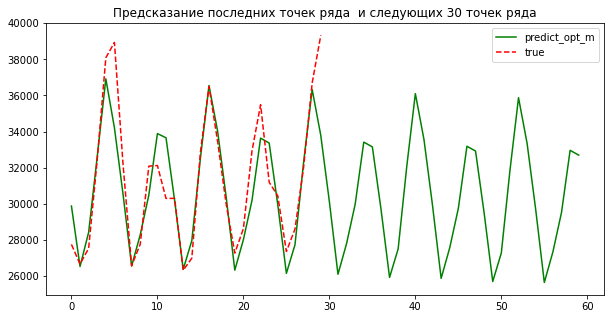

In [30]:
plt.figure(figsize=(10,5))
pred_dynamic_opt_m = results_opt_m.forecast(60)

plt.plot(pred_dynamic_opt_m,'g', label='predict_opt_m' )
#Отобразим истинный значения 
plt.plot(data_m['PJME_MW'].values[-30:],'--r',label='true')
plt.title('Предсказание последних точек ряда  и следующих 30 точек ряда')
plt.legend()

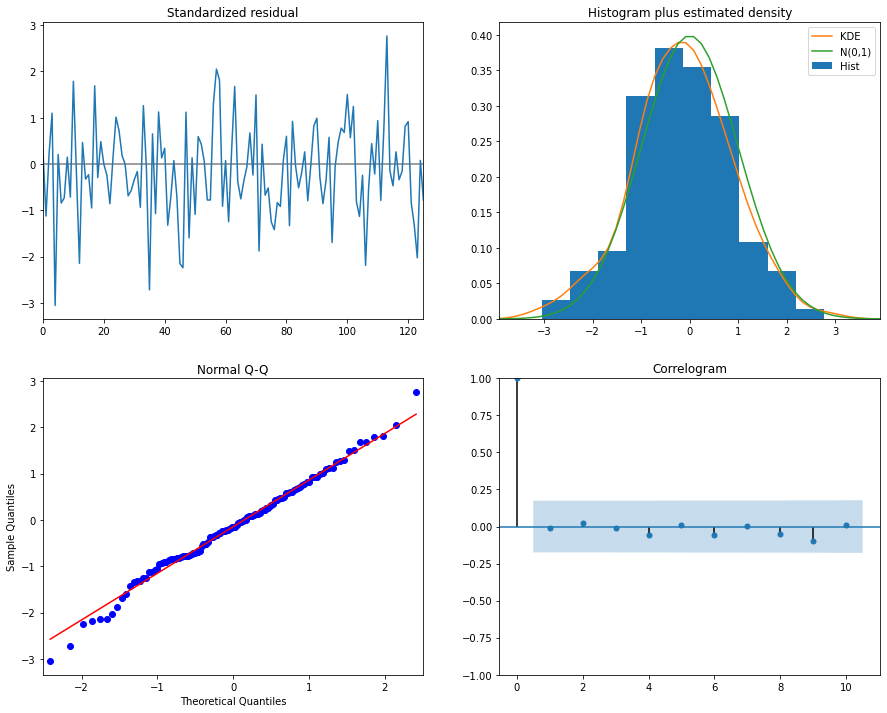

In [31]:
results_opt_m.plot_diagnostics(figsize=(15, 12))
plt.show()

In [32]:
DF_resid = sm.tsa.stattools.adfuller(results_opt_m.resid, regression='ctt')
DF_resid

(-17.933902495026448,
 0.0,
 0,
 169,
 {'1%': -4.441022560115803,
  '5%': -3.867796785663158,
  '10%': -3.575112928425384},
 2746.3994707147676)

Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)

In [62]:
brent_data = pd.read_csv('my_BRENT2019.csv',sep = ',', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


Text(0.5, 0, 't')

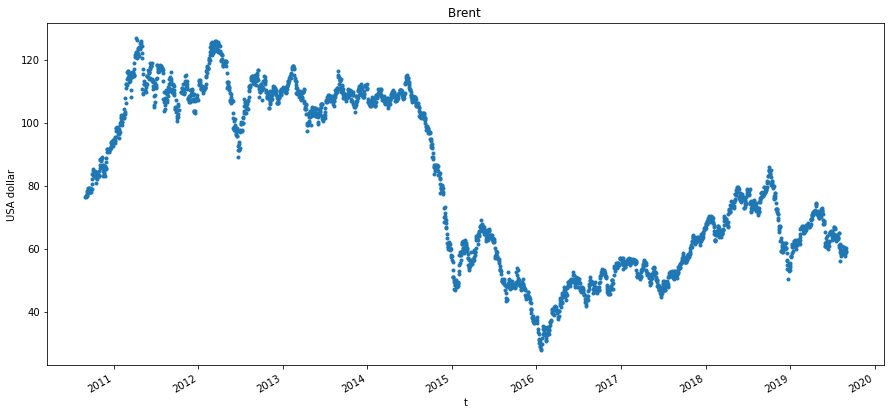

In [63]:
_ = brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [64]:
brent_w = brent_data.resample('W').mean()

In [65]:
brent_w.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.2,0.000000
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.0,0.166667
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.0,0.000000
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.0,0.000000
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.0,0.000000


In [66]:
brent_w[brent_w['Значение'].isna()]

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2011-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


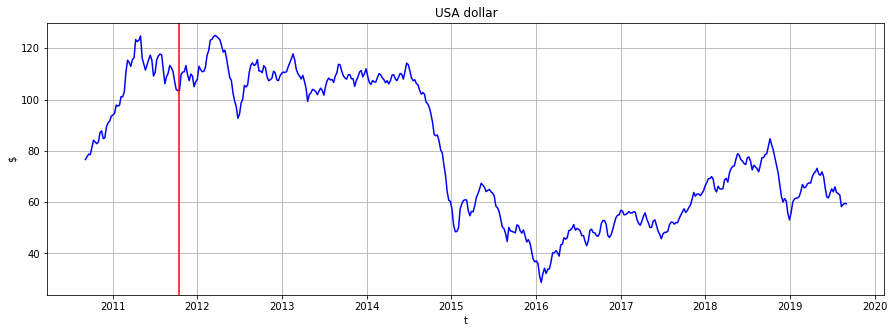

In [90]:
plt.figure(figsize =(15,5))
plt.plot(brent_w.index, brent_w['Значение'], 'b')
plt.axvline(pd.to_datetime('2011-10-16'), color='red')
plt.title('USA dollar' )
plt.ylabel ( '$' )
plt.xlabel ( 't' )
plt.grid()

In [68]:
brent_w.fillna(method='pad', inplace=True)

In [69]:
brent_w.loc['2011-10-09':'2011-10-23']

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2011-10-09,103.476667,2011.0,10.0,5.666667,4.0,278.666667,40.0,2.666667,0.0,0.166667,0.0
2011-10-16,103.476667,2011.0,10.0,5.666667,4.0,278.666667,40.0,2.666667,0.0,0.166667,0.0
2011-10-23,109.756667,2011.0,10.0,21.333333,4.0,294.333333,42.0,4.333333,0.0,0.000000,0.0


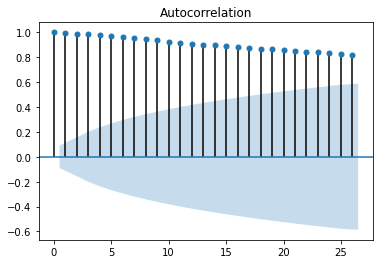

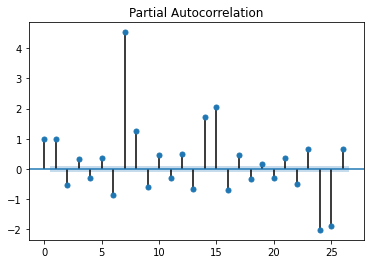

In [72]:
sm.graphics.tsa.plot_acf(brent_w['Значение'].values, lags=26)
plt.show()
sm.graphics.tsa.plot_pacf(brent_w['Значение'].values, lags=26)
plt.show()

In [74]:
import itertools

# Определим p, d и q
p = range(0,4)
q = range(0,16)
d = [1, 2]
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))

print('Examples of parameter combinations for ARIMA...')
print('ARIMA: {} '.format(pdq[1]))
print('ARIMA: {} '.format(pdq[2]))

Examples of parameter combinations for ARIMA...
ARIMA: (0, 1, 1) 
ARIMA: (0, 1, 2) 


In [78]:
warnings.filterwarnings("ignore")

min_aic = np.inf

for param in pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(brent_w['Значение'].values[:-12],order=param,
                                seasonal_order=[0,0,0,0], trend='ct',
                                enforce_stationarity=False,
                                enforce_invertibility=False)

        results = mod.fit()
        if results.aic < min_aic:
            min_aic = results.aic
            best_param = param
        print('ARIMA{} - AIC: {}'.format(param, results.aic))
    except:
        continue

ARIMA(0, 1, 0) - AIC: 2045.7096114056817
ARIMA(0, 1, 1) - AIC: 1985.1777238422965
ARIMA(0, 1, 2) - AIC: 1983.5872284645463
ARIMA(0, 1, 3) - AIC: 1980.076931570639
ARIMA(0, 1, 4) - AIC: 1977.4533759195233
ARIMA(0, 1, 5) - AIC: 1973.826081233714
ARIMA(0, 1, 6) - AIC: 1968.8103759323938
ARIMA(0, 1, 7) - AIC: 1963.3994452375525
ARIMA(0, 1, 8) - AIC: 1959.212256573921
ARIMA(0, 1, 9) - AIC: 1958.6549685774626
ARIMA(0, 1, 10) - AIC: 1955.2741281691924
ARIMA(0, 1, 11) - AIC: 1949.3166573674048
ARIMA(0, 1, 12) - AIC: 1943.735131465186
ARIMA(0, 1, 13) - AIC: 1942.8216958385528
ARIMA(0, 1, 14) - AIC: 1941.016779895142
ARIMA(0, 1, 15) - AIC: 1938.971461697169
ARIMA(0, 2, 0) - AIC: 2169.8917278158833
ARIMA(0, 2, 1) - AIC: 2043.1065122031214
ARIMA(0, 2, 2) - AIC: 1982.9919556667198
ARIMA(0, 2, 3) - AIC: 1982.9023656212116
ARIMA(0, 2, 4) - AIC: 1979.7788678690958
ARIMA(0, 2, 5) - AIC: 1978.848560018117
ARIMA(0, 2, 6) - AIC: 1976.7811976933403
ARIMA(0, 2, 7) - AIC: 1978.2217068320876
ARIMA(0, 2, 8) - 

In [79]:
print('Лучшая модель:')
print('ARIMA{} - AIC: {}'.format(best_param, min_aic))

Лучшая модель:
ARIMA(0, 1, 15) - AIC: 1938.971461697169


In [80]:
#модель на недельном ресемплинге
mod_brent_w = sm.tsa.statespace.SARIMAX(brent_w['Значение'].values[:-12],order=[0,1,15],
                                seasonal_order=[0,0,0,0] ,trend='ct',
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_brent_w = mod_brent_w.fit()
print(f'AIC: {results_brent_w.aic}')

AIC: 1938.971461697169


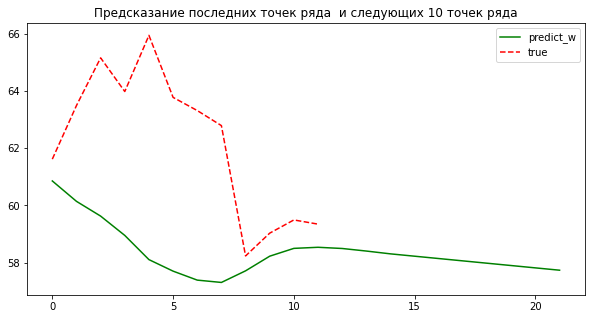

In [83]:
plt.figure(figsize=(10,5))
pred_dynamic_brent_w = results_brent_w.forecast(22)

plt.plot(pred_dynamic_brent_w,'g', label='predict_w' )
#Отобразим истинный значения 
plt.plot(brent_w['Значение'].values[-12:],'--r',label='true')
plt.title('Предсказание последних точек ряда  и следующих 10 точек ряда')
plt.legend()

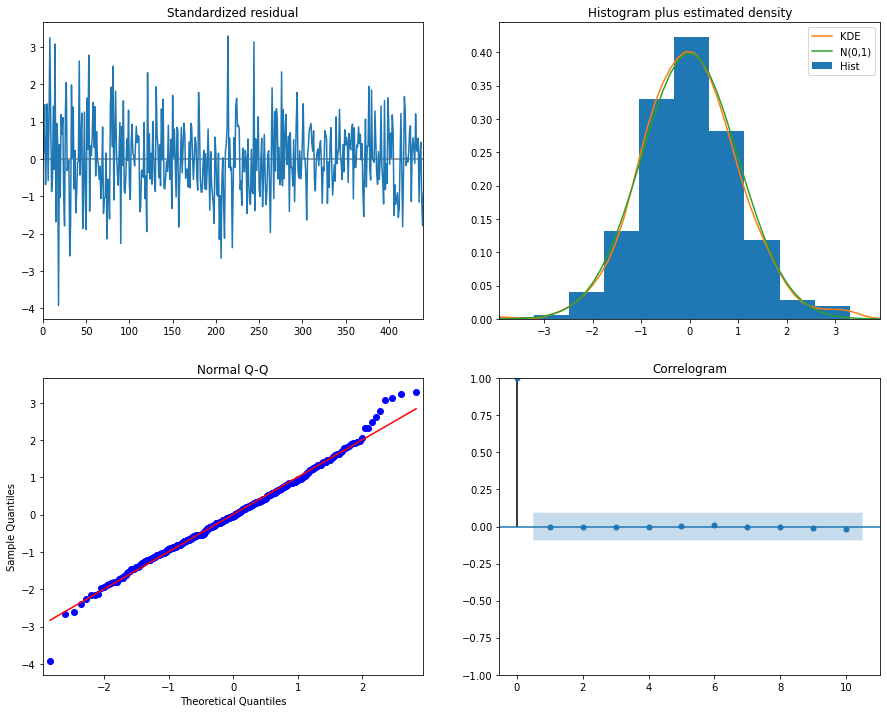

In [85]:
results_brent_w.plot_diagnostics(figsize=(15, 12))
plt.show()